# Lab 2: Parametric Classifiers
Machine Learning 2020/2021 <br>
Ruben Wiersma and David Tax

Revised by Yorick de Vries

**WHAT** This nonmandatory lab consists of several programming and insight exercises/questions on k-nn density estimation.

**WHY** The exercises are meant to familiarize yourself with the basic concepts of parametric classifiers.

**HOW** Follow the exercises in this notebook either on your own or with a fellow student. If you want to skip right to questions and exercises, find the $\rightarrow$ symbol.  
For questions and feedback please consult the TAs during the lab session. 

$\newcommand{\q}[1]{\rightarrow \textbf{Question #1}}$
$\newcommand{\ex}[1]{\rightarrow \textbf{Exercise #1}}$

## The Bayes classifier

In this assignment, you will implement your own Bayes classifier. Because this is your first assignment, we will walk you through the steps from loading and inspecting the data, to running your classifier.

Specifically, this assignment consists of the following steps:
0. Classification using Gaussian distributions
1. Getting to know the data
2. Validation sets
3. Univariate model
4. Probability density function
5. Posterior probabilities
6. Bayes classifier

Work your way through these exercises at your own pace and be sure to ask questions to the TA's when you don't understand something. It's important that you get what is happening here, as it is a fundamental building block of machine learning.

## 0. Classification using Gaussian distributions

We are starting with a very important notion in machine learning: probability distributions. Occurrences of data typically follow probability distributions that we know how to model.

Say, you want to classify apples vs. oranges. A _feature_ that you could use to classify them is their colour. We know, of course, that oranges are orange and apples (the golden delicious kind) are green, but each orange is a slightly different shade of orange. Likewise, the apples are all a different shade of green. If we would plot the colour values against the number of fruits with that colour, we would see, however, that there are probably more oranges with a certain type of shade than with other colours. They tend to follow known probability distributions.

In this assignment, we will assume data that has a normal distribution and try to estimate the **parameters** of the assumed normal distribution to correctly fit our data, hence the name **parametric classifiers**. We will then use Bayes' rule to build a classifier based on the probability distribution.

Just to refresh your mind, this is what a normal distribution looks like:
![Normal distribution for oranges](gaussian.png)

Instead of apples and oranges, we will try to classify flowers from Fisher's Iris dataset. The dataset contains the measurements of *length* and *width* of the *sepals* and *petals* of 150 flowers. 

![Petal and sepal in Iris flowers](Petal-sepal.jpg)

Using the distribution of these 4 features (*length* and *width* of both *sepals* and *petals*), the flowers can then be classified as one of 3 species of Iris flower:

* Iris setosa
* Iris versicolor
* Iris virginica

This dataset is such a classic example that it is even included in machine learning libraries. The following code will load the dataset from `scikit-learn` (this was installed with conda) into the variable `iris`.

$\ex{0.1}$ Run the code and inspect what data is contained in `iris`. Can you identify the 4 attributes? What other information is contained in `iris`?

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## 1. Getting to know the data

The dataset is stored as a dictionary, a data structure in Python that resembles a Java(script) object. We can access items in the dictionary with a dot `.`, so we access the data and their target labels with `iris.data` and `iris.target`, these are both NumPy arrays. If we want to know what each digit means, we can access the names with `iris.target_names`.

$\ex{1.1}$ Run the code fragment and confirm what it is doing. Try to understand the indexing and print the following data:
- The last five flowers. Expected result: an array with shape (5, 4).
- Only the third feature of each flower. Expected result: an array with shape (150,).
- The names of the first ten flowers. Expected result: an array with shape (10,).
- Three separate arrays (one for each class). Expected result: three arrays with shape (50, 4). Try doing this without assuming anything about the indices for each class, i.e.: do not simply use `class1 = iris.data[:50, :]`. You can use `np.where`. This function takes in a boolean statement and returns the indices for which the statement is true. Example use: `np.where(iris.target == 0)` returns all indices where the target label is 0.

__Hint__ Look at the indexing chapter in last week's NumPy lab for help.

In [9]:
print("First five flowers: \n", iris.data[:5, :])
print("Their labels: ", iris.target[:5])
print("And the label names: ", iris.target_names)

last_five_flowers = iris.data[-5:]
third_feature_only = iris.data[:, 2]
first_ten_names = iris.target[:10]
# START ANSWER
# END ANSWER

setosa_flowers = iris.data[iris.target==0]
versicolor_flowers = iris.data[iris.target==1]
virginica_flowers = iris.data[iris.target==2]
# START ANSWER
# END ANSWER


print("Last five flowers: \n", last_five_flowers)
print("Only the third feature: ", third_feature_only)
print("All label names: ", first_ten_names)
 
print("Class: ", iris.target_names[0], "; Items: \n", setosa_flowers)

assert last_five_flowers.shape == (5,4), "Expected a two dimensional array of shape (5,4)"
assert third_feature_only.shape == (150,), "Expected an array of shape (150,)"
assert first_ten_names.shape == (10,), "Expected an array of shape (10,)"

assert setosa_flowers.shape == (50,4), "Expected a two dimensional array of shape (50,4)"
assert versicolor_flowers.shape == (50,4), "Expected a two dimensional array of shape (50,4)"
assert virginica_flowers.shape == (50,4), "Expected a two dimensional array of shape (50,4)"

First five flowers: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Their labels:  [0 0 0 0 0]
And the label names:  ['setosa' 'versicolor' 'virginica']
Last five flowers: 
 [[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]
Only the third feature:  [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]
All label names:  [0 0 0 0 0 0 0 0 0 0]
Class:  s

Next, to get an idea of the distribution of our data, we can make plots.

$\ex{1.2}$ Run the following code to plot the petal length and width of each flower as a scatterplot. Inspect the code carefully, as you will need to write your own code for plotting later on.

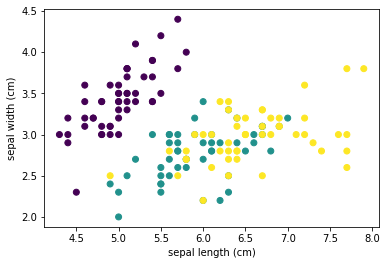

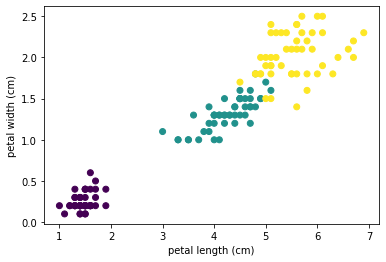

In [10]:
# From the Matplotlib library, import pyplot. We will refer to this library later as plt.
# This is a widely used library that lets you create images and plot your data.
from matplotlib import pyplot as plt

# Create a scatterplot of the first two features, and use their labels as colour values.
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
# Create a scatterplot of the third and fourth feature.
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

$\q{1.1}$ How are the points distributed? Could you fit a probability distribution that you know on this data (e.g. uniform, normal, etc.)?

## 2. Test sets

Now that we have an idea what our dataset looks like, our goal is to create a model that will predict the class of each flower based on its features. In order to evaluate how well the model fits, we will also need a separate test set where we can evaluate our final model on. For this, we will split the data randomly in a train and test set.

$\ex{2.1}$ Use the code below to split the dataset into a train and validation set.

In [11]:
from sklearn.model_selection import train_test_split #to split in train and test set

# load the data and create the training and test sets
iris = datasets.load_iris()
# X is the feature vectors for the data points, and Y is the target (ground truth) class for those data points 
# the iris.data and iris.target entries are randomly divided into training and test sets.
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=20)

# Due to the randomness of the split, number of each flowers is not necessarily the same
# Separate the training dataset into the three flower types.
setosa_X_train = X_train[Y_train==0]
versicolor_X_train = X_train[Y_train==1]
virginica_X_train = X_train[Y_train==2]
# START ANSWER
# END ANSWER

assert setosa_X_train.shape[0] != versicolor_X_train.shape[0]
assert setosa_X_train.shape[0] != virginica_X_train.shape[0]
assert versicolor_X_train.shape[0] != virginica_X_train.shape[0]

setosa_X_train.shape, versicolor_X_train.shape, virginica_X_train.shape

((37, 4), (32, 4), (36, 4))

## 3. Univariate model

Looking at the plots of the data from the previous section, you might assume that separating the different classes would be a lot easier based on the petal data (3rd and 4th variable) than on the sepal data (1st and 2nd variable), as it is easier to distinguish the different clusters in that plot. In fact, for now we will only focus on one variable, the petal length (3rd feature), as it looks like it might be useful just on its own and this will simplify the model a lot.

In [12]:
# We use the third feature
feature_idx = 2

Let's first take a look at the distribution of all flowers (both train and test) along this feature to confirm that our assumption of a normal distribution is correct. Take a look at the ditribution of the other features as well.

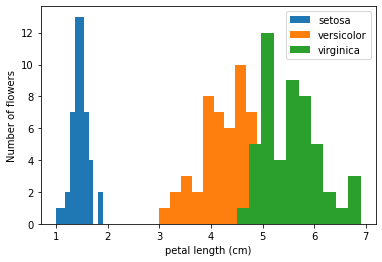

In [13]:
plt.hist(setosa_flowers[:,feature_idx], label=iris.target_names[0])
plt.hist(versicolor_flowers[:,feature_idx], label=iris.target_names[1])
plt.hist(virginica_flowers[:,feature_idx], label=iris.target_names[2])
plt.xlabel(iris.feature_names[feature_idx])
plt.ylabel('Number of flowers')
plt.legend()
plt.show()

That looks about correct! Now, let's find the parameters of the normal distribution that describe our data best. The parameters that we need to describe the distribution are the _mean_ and _standard deviation_.

$\ex{3.1}$ Using the training data from each of 3 classes, compute the mean ($\mu$) and standard deviation ($\sigma$) for the *petal length* attribute. The Maximum Likelihood Estimators for these are given by

(3.1) $$\mu = \frac{\sum_{t=1}^Nx^t}{N}$$

(3.2) $$\sigma = \sqrt{\frac{\sum_{t=1}^N(x^t - m)^2}{N}}$$

__Hint__ Try to use numpy's functions to perform operations on your input (e.g. `np.sum`, `np.sqrt`)

In [16]:
def compute_mean(x):
    return np.mean(x)
    mean = 0
    # START ANSWER
    # END ANSWER
    return mean
    
def compute_sd(x, mean):
    # return np.mean((x - mean) ** 2) ** .5
    return np.std(x)
    # START ANSWER
    # END ANSWER
    return sd

# Compute the mean for each flower type.
mean_setosa = compute_mean(setosa_X_train[:, feature_idx])
mean_versicolor = compute_mean(versicolor_X_train[:, feature_idx])
mean_virginica = compute_mean(virginica_X_train[:, feature_idx])

# Compute the standard deviation for each flower type.
sd_setosa = compute_sd(setosa_X_train[:, feature_idx], mean_setosa)
sd_versicolor = compute_sd(versicolor_X_train[:, feature_idx], mean_versicolor)
sd_virginica = compute_sd(virginica_X_train[:, feature_idx], mean_virginica)

# Print the computed means and standard deviations.
print("setosa", mean_setosa, sd_setosa)
print("versicolor", mean_versicolor, sd_versicolor)
print("virginica", mean_virginica, sd_virginica)

assert np.isclose(mean_setosa, 1.4729729729729728), "Expected a different mean"
assert np.isclose(mean_versicolor, 4.25), "Expected a different mean"
assert np.isclose(mean_virginica, 5.572222222222222), "Expected a different mean"

assert np.isclose(sd_setosa, 0.17652600857089654), "Expected a different standard deviation"
assert np.isclose(sd_versicolor, 0.44300112866673375), "Expected a different standard deviation"
assert np.isclose(sd_virginica, 0.547017728288333), "Expected a different standard deviation"

setosa 1.4729729729729728 0.17652600857089654
versicolor 4.25 0.44300112866673375
virginica 5.572222222222222 0.547017728288333


$\q{3.1}$ Do these mean values and standard deviations correspond to the histograms that we plotted? If not, try to fix your code.

## 4. Probability density function

The probability density function for a Gaussian distribution is defined as

(4.1) $$p(x|\mu, \sigma)=\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

That means that if we have estimates for $\mu$ and $\sigma$, we can compute the probability density for a specific value $x$.

$\ex{4.1}$ Implement the `normal_PDF` function below. Given `x`, `mean`, and `sd`, we want to return the result of $p(x|\mu, \sigma)$. Your PDF is plotted. You can play around with different configurations of `mean` and `sd` to see how these parameters influence your normal distribution.

**NOTE:** This normal distribution should look similar to the normal distribution at chapter 0. (This normal distribution does have a different mean and standard deviation).

Your pdf function outcome:  0.008863696823876015  Scipy's function outcome:  0.008863696823876015


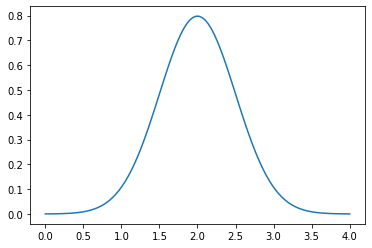

In [17]:
from scipy.stats import norm

def normal_PDF(x, mean, sd):
    pdf = 1 / (2 * np.pi * sd ** 2) ** .5
    pdf *= np.exp(-(x- mean) ** 2 / (2 * sd ** 2))
    # START ANSWER
    # END ANSWER
    return pdf

# Set x, mean and standard deviation
x = 0.5
mean = 2
sd = 0.5
my_pdf = normal_PDF(x, mean, sd)

# You can compare your outcome to scipy's built-in normal PDF
scipy_pdf = norm.pdf(x, mean, sd)
print("Your pdf function outcome: ", my_pdf, " Scipy's function outcome: ", scipy_pdf)
assert np.isclose(my_pdf, scipy_pdf)

# And we plot the result of your PDF function for 100 points between 0 and 4: np.linspace(0, 4, 100)
xs = np.linspace(0, 4, 100)
plt.plot(xs, normal_PDF(xs, mean, sd))
plt.show()

We already made estimates for $\mu$ and $\sigma$ for the *petal length* for each of the 3 classes, so we can now also define PDFs for each separate class.

$\ex{4.2}$ Plot the 3 functions using [linspace](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linspace.html) for a range of x-values aside the histograms of the classes.

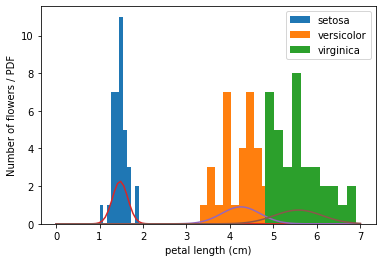

In [18]:
# Histograms of the flower types of the training set
plt.hist(setosa_X_train[:,feature_idx], label=iris.target_names[0])
plt.hist(versicolor_X_train[:,feature_idx], label=iris.target_names[1])
plt.hist(virginica_X_train[:,feature_idx], label=iris.target_names[2])

# Plot your PDFs here
xs = np.linspace(0, 7, 100)
# START ANSWER
plt.plot(xs, normal_PDF(xs, mean_setosa, sd_setosa))
plt.plot(xs, normal_PDF(xs, mean_versicolor, sd_versicolor))
plt.plot(xs, normal_PDF(xs, mean_virginica, sd_virginica))
# END ANSWER

plt.xlabel(iris.feature_names[feature_idx])
plt.ylabel('Number of flowers / PDF')
plt.legend()
plt.show()

$\q{4.1}$ Do your distributions and the histogram overlap? In what ways are the histogram and the probability distributions different?

__Hint__ The histogram shows the number of flowers that have a petal length within a certain window (bin). That means the values shown in the histogram are absolute counts.

## 5. Posterior probabilities

The plot above shows the probability densities for a feature $x$. For a normal distributed feature of a class $C_i$, you only need to know the mean and the standard deviation to be able to determine the probability of obtaining that data point $x$, i.e. $p(x | \mu_i, \sigma_i)$ or $p(x | C_i)$. So, $p(x | C_i)$ is the probability density of observing $x$ knowing that the datapoint comes from $C_i$.

- The prior probabillity is the probability density of a certain class $C_i$, without having any observations (knowledge); $p(C_i)$.
- The posterior probabillity is the probability density of a certain class $C_i$, knowing a datapoint $x$ you observed; $p(C_i | x)$.

$\q{5.1}$ Stop for a moment to try and understand what this probability means: $p(x | C_i)$.

__Hint__ The $|$ sign in $p(x | C_i)$ means: given that.


However, what would be useful for classification, is the posterior probabilities of the classes given the data, i.e. $P(C_i | x)$.

$\q{5.2}$ Can you explain this mathematical formulation in your own words?

$\q{5.3}$ Why is it helpful to know the posterior probability?

__Hint__ What information do we have for test points coming in?


To get the posterior probability, we can use Bayes' rule:

(5.1) $$P(C_i | x) =  \frac{p(x | C_i) P(C_i)}{p(x)} = \frac{p(x | C_i) P(C_i)}{\sum_{k=1}^K p(x | C_k) P(C_k)}$$

We will construct our classifier such that, after observing a datapoint $x$, we assign the point to the class $C_i$ with the higest $P(C_i | x)$, so to the class which is most likely.

$\ex{5.1}$ Finish the code to compute the posterior probability of a point $x$, given the mean, standard deviation, and class index.

__Hint__ The mean and standard deviation are given as arrays. You can access the mean for class `i` with `mean[i]`.

In [25]:
def posterior(x, means, sds, priors, i):
    """
    Compute the posterior probability P(C_i | x).
    :param x: the sample to compute the posterior probability for.
    :param means: an array of means for each class.
    :param sds: an array of standard deviation values for each class.
    :param priors: an array of frequencies for each class.
    :param i: the index of the class to compute the posterior probability for.
    """
    posterior = 0
    # START ANSWER
    p_xcs = [normal_PDF(x, means[i], sds[i]) for i, _ in enumerate(means)]
    return p_xcs[i] * priors[i] / sum([p_c * p_xc for p_c, p_xc in zip(priors, p_xcs)])
    #p_c = priors[i]
    #p_x = sum([p_xc * p_c for gpt])
    ##END ANSWER
    #return p * p_c

means = [mean_setosa, mean_versicolor, mean_virginica]
sds = [sd_setosa, sd_versicolor, sd_virginica]
priors = [
    setosa_X_train.shape[0]/X_train.shape[0],
    versicolor_X_train.shape[0]/X_train.shape[0],
    virginica_X_train.shape[0]/X_train.shape[0]
]

# Test out the code
flower_idx = 6
print("Flower belongs to class", iris.target_names[Y_train[flower_idx]])

# iterate over all classes
for i in range(3):
    x_post = posterior(X_train[flower_idx, feature_idx], means, sds, priors, i)
    print("Posterior probability for class", iris.target_names[i], ": ", x_post)

post_setosa = posterior(X_train[flower_idx, feature_idx], means, sds, priors, 0)
post_versicolor = posterior(X_train[flower_idx, feature_idx], means, sds, priors, 1)
post_virginica = posterior(X_train[flower_idx, feature_idx], means, sds, priors, 2)

assert np.isclose(post_setosa, 1.1048294835009998e-107, rtol = 0.0001, atol = 0.), "Expected a different posterior probability"
assert np.isclose(post_versicolor, 0.03817178391547811, rtol = 0.0001, atol = 0.), "Expected a different posterior probability"
assert np.isclose(post_virginica, 0.9618282160845218, rtol = 0.0001, atol = 0.), "Expected a different posterior probability"

Flower belongs to class virginica
Posterior probability for class setosa :  1.1048294835009998e-107
Posterior probability for class versicolor :  0.03817178391547811
Posterior probability for class virginica :  0.9618282160845218


$\ex{5.2}$ Plot the posterior probabilities for all 3 classes. Does the plot of these 3 posteriors make sense based on the data?

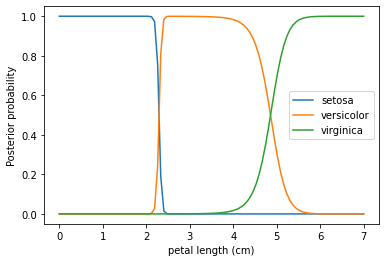

In [28]:
xs = np.linspace(0, 7, 100)
# START ANSWER
plt.plot(xs, posterior(xs, means, sds, priors, 0), label="setosa")
plt.plot(xs, posterior(xs, means, sds, priors, 1), label="versicolor")
plt.plot(xs, posterior(xs, means, sds, priors, 2), label="virginica")
# END ANSWER
plt.xlabel(iris.feature_names[feature_idx])
plt.ylabel('Posterior probability')
plt.legend()
plt.show()

$\q{5.4}$ Where would you put the decision boundary for each class? In other words: where would you draw the line, separating each class. Could you formulate this mathematically?

## 6. Bayes Classifier

Now that we can compute the posteriors for every class, constructing a classifier is easy. The Bayes classifier is defined as

- Classify as $C_i$ for which: $i = argmax_i\ P(C_i |x)$

$\ex{6.1}$ Write the code for the `classify` function. It should classify a single data point $x$ as one of the 3 classes, returning $0$, $1$ or $2$ based on the class the flower is most likely to belong to. The other arguments of the function should therefore be the vector of mean estimates `means` and the vector of standard deviation estimates `sds`, the class distribution `priors` and index `i` corresponds to class $C_i$.

In [34]:
def classify(x, means, sds, priors):
    classification = -1
    # START ANSWER
    probs = np.stack([posterior(x, means, sds, priors, i) for i, _ in enumerate(means)])
    return probs.argmax(axis=0)
    # END ANSWER
    return classification

# Test out the code
flower_idxs = [5,20,30]
predicted_classes = np.zeros(3, dtype=np.int64)
for i, flower_idx in enumerate(flower_idxs):
    predicted_classes[i] = classify(X_train[flower_idx, feature_idx], means, sds, priors)

print("Predicted class", iris.target_names[predicted_classes])
print("Flower belongs to class", iris.target_names[Y_train[flower_idxs]])
assert (predicted_classes == Y_train[flower_idxs]).all()

Predicted class ['virginica' 'versicolor' 'setosa']
Flower belongs to class ['virginica' 'versicolor' 'setosa']


$\ex{6.2}$ Finally, complete the `evaluate` function below. It should take a test set, the expected classes (ground truth; correct classifications of each element in the test set) and the vectors `means`, `sds` and `priors`. The function calculates the classifications (decides which class each point belongs to) based on the distributions learnt from the training set. The function should return the percentage of elements in the test set that were classified correctly.

**Note** We only use the testset now to be able to make an unbiased estimation of the quality of the classifier. If we would include the testset in our training data, the evaluation would not be fair as knowledge of the test data would be included in the model.

__Hint__ You will only need to use the *petal length* variable from each data point to attempt to classify it (since that is how we trained our model).

In [35]:
def evaluate(X_test, Y_test, means, sds, priors):
    accuracy = 0
    # START ANSWER
    return np.mean(classify(X_test, means, sds, priors) == Y_test)
    # END ANSWER
    return accuracy

accuracy = evaluate(X_test[:, feature_idx], Y_test, means, sds, priors)

print(accuracy)
assert accuracy > 0.9, "Expected a higher accuracy"

0.9555555555555556


Let's return to our scatterplots and see how your classifier makes decisions. For this, we also plot the decision boundary. The function to create the decision boundaries does this in a very simple way:
- For each class, compute the posterior for 1000 points between 1 and 7
- If for any two classes the posteriors are as good as equal (and not very close to 0) at a point, add that point to the list of decision boundaries
- Plot vertical lines at these points

$\q{6.1}$ This method is quite complicated. Could you analytically solve the equations?

__Hint__ You have to find the $x$ for which the class probabilities are equal. You can formulate this equality with the probability functions and solve that equation.

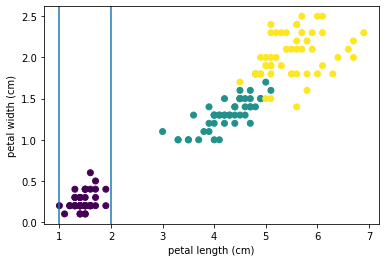

In [36]:
def decision_boundary(means, sds, priors):
    decision_boundaries = []
    # START ANSWER
    
    # END ANSWER
    return decision_boundaries

# Create a scatterplot of the third and fourth feature.
feature_idx2 = 3

plt.scatter(iris.data[:, feature_idx], iris.data[:, feature_idx2], c=iris.target)
plt.xlabel(iris.feature_names[feature_idx])
plt.ylabel(iris.feature_names[feature_idx2])
decision_boundaries = decision_boundary(means, sds, priors)
for boundary in decision_boundaries:
    plt.axvline(x=boundary)

plt.show()

$\q{6.2}$ You have now successfully implemented a Bayes-classifier. Try to change the feature used in the classifier `feature_idx` and see how it affects the performance. Was the choice of petal width a good choice? And was there another feature which performs good as well?